# Chess Games Results Exploratory Analysis
________

## Overview
In this project I will explore the __'First-move advantage in chess'__ thesis.

**[First-move advantage in chess](https://en.wikipedia.org/wiki/First-move_advantage_in_chess)** — there is a general consensus among chess players and theorists that the player who makes the first move (White) has an inherent advantage.

So, I'm going to check this statement based on the dataset from **[Kaggle](https://www.kaggle.com/datasnaek/chess)**.

I will use the following libraries:

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#%matplotlib inline

## Importing Data

In [2]:
df = pd.read_csv('games.csv')

In [3]:
df.columns

Index(['id', 'rated', 'created_at', 'last_move_at', 'turns', 'victory_status',
       'winner', 'increment_code', 'white_id', 'white_rating', 'black_id',
       'black_rating', 'moves', 'opening_eco', 'opening_name', 'opening_ply'],
      dtype='object')

In [4]:
df.shape

(20058, 16)

In [5]:
df.isna().sum()

id                0
rated             0
created_at        0
last_move_at      0
turns             0
victory_status    0
winner            0
increment_code    0
white_id          0
white_rating      0
black_id          0
black_rating      0
moves             0
opening_eco       0
opening_name      0
opening_ply       0
dtype: int64

Dataset is clean, no missing values

## Analytics

### Overall

Let's see the total results in our dataset

In [6]:
overall = df.groupby('winner', as_index=False).agg(wins= ('winner', 'count'))
overall['share,%'] = round(overall.wins / overall.wins.sum() * 100, 2)
overall

,winner,wins,"share,%"
0,black,9107,45.40
1,draw,950,4.74
2,white,10001,49.86


__Seems that indeed `White` win more often in general__

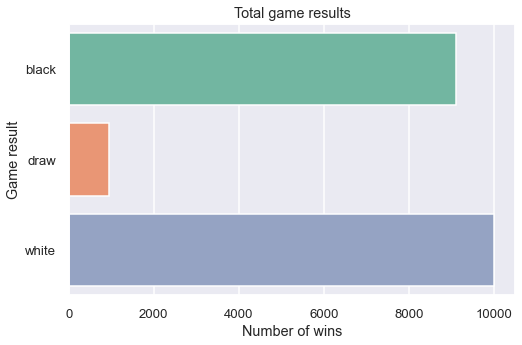

In [7]:
plt.figure(figsize=(8, 5))
sns.set_theme(context='talk', style='darkgrid', palette= 'Set2', font='sans-serif', font_scale=0.8, color_codes=True, rc=None)
sns.barplot(x='wins', y='winner', data=overall).set(xlabel='Number of wins', ylabel='Game result', title='Total game results')
plt.savefig('gen.png')
plt.show()

### By game type

The game type determines the time limit for the whole game (min) + time added after each move (sec).
Let's group the data by the type of games (400 in the sample) and their number in descending order.

Top 10 most popular game types and their win percentage:

In [8]:
data_game_type = df.loc[:,['id','increment_code']].join(pd.get_dummies(df.winner))
data_game_type = data_game_type.groupby('increment_code') \
    .agg(Number_of_games=('id', 'count'), 
         Black_won = ('black', 'sum'), 
         White_won = ('white', 'sum'),
         Draw = ('draw', 'sum')) \
    .sort_values('Number_of_games', ascending=False)

In [9]:
# add some new columns, like percentage of `white won`, `black won` and `draw` results and the difference
data_game_type = data_game_type.assign(black_won_perc = round(data_game_type.Black_won/data_game_type.Number_of_games * 100, 2),
                  white_won_perc = round(data_game_type.White_won/data_game_type.Number_of_games * 100, 2),
                  draw_perc = round(data_game_type.Draw/data_game_type.Number_of_games * 100, 2),
                  w_b_perc = round((data_game_type.White_won-data_game_type.Black_won)/data_game_type.Number_of_games * 100 ,2)) \
    .sort_values('Number_of_games', ascending=False)

In [10]:
data_game_type.head(10)

,Number_of_games,Black_won,White_won,Draw,black_won_perc,white_won_perc,draw_perc,w_b_perc
increment_code,,,,,,,,
10+0,7721,3561.0,3844.0,316.0,46.12,49.79,4.09,3.67
15+0,1311,603.0,656.0,52.0,46.00,50.04,3.97,4.04
15+15,850,394.0,417.0,39.0,46.35,49.06,4.59,2.71
5+5,738,330.0,379.0,29.0,44.72,51.36,3.93,6.64
5+8,697,327.0,346.0,24.0,46.92,49.64,3.44,2.73
8+0,588,260.0,294.0,34.0,44.22,50.00,5.78,5.78
10+5,579,273.0,285.0,21.0,47.15,49.22,3.63,2.07
15+10,461,190.0,235.0,36.0,41.21,50.98,7.81,9.76
20+0,448,206.0,223.0,19.0,45.98,49.78,4.24,3.79


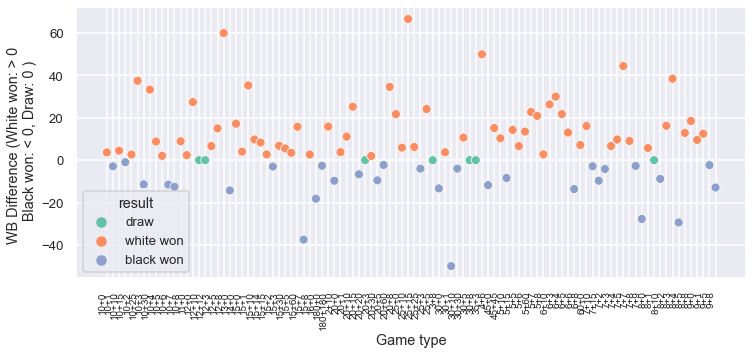

In [11]:
result = data_game_type.w_b_perc.apply(lambda x: 'white won' if x>0 else 'black won' if x<0 else 'draw').rename('result')
plt.figure(figsize=(12,5))
sns.scatterplot(x='increment_code', y='w_b_perc', data=data_game_type.head(100), hue=result).set(xlabel='Game type', ylabel='WB Difference (White won: > 0 \n Black won: < 0, Draw: 0 )')
plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small')
plt.show()

In [12]:
result.iloc[:100].value_counts()

white won    63
black won    30
draw          7
Name: result, dtype: int64

__So, white won more often in 63 game types out of 100__ <br>
__Black won more often in 30 game types out of 100__

### By debut type

Let's group games by the [ECO](https://www.365chess.com/eco.php) code of the debut (total 365 in a dataset) and by their amount in descending order.

Top 10 game debuts and their results:

In [13]:
data_debut_type = df.loc[:,['id','opening_eco']].join(pd.get_dummies(df.winner)) \
    .groupby('opening_eco') \
    .agg(Number_of_games=('id', 'count'), 
         Black_won = ('black', 'sum'), 
         White_won = ('white', 'sum'),
         Draw = ('draw', 'sum')) \
    .sort_values('Number_of_games', ascending=False)
data_debut_type= data_debut_type.assign(black_won_perc = round(data_debut_type.Black_won/data_debut_type.Number_of_games * 100, 2),
                  white_won_perc = round(data_debut_type.White_won/data_debut_type.Number_of_games * 100, 2),
                  draw_perc = round(data_debut_type.Draw/data_debut_type.Number_of_games * 100, 2),
                  w_b_perc = round((data_debut_type.White_won-data_debut_type.Black_won)/data_debut_type.Number_of_games * 100 ,2)) \
    .sort_values('Number_of_games', ascending=False)

In [14]:
data_debut_type.head(10)

,Number_of_games,Black_won,White_won,Draw,black_won_perc,white_won_perc,draw_perc,w_b_perc
opening_eco,,,,,,,,
A00,1007,570.0,398.0,39,56.60,39.52,3.87,-17.08
C00,844,389.0,417.0,38,46.09,49.41,4.50,3.32
D00,739,360.0,341.0,38,48.71,46.14,5.14,-2.57
B01,716,332.0,358.0,26,46.37,50.00,3.63,3.63
C41,691,267.0,396.0,28,38.64,57.31,4.05,18.67
C20,675,355.0,299.0,21,52.59,44.30,3.11,-8.30
A40,618,261.0,338.0,19,42.23,54.69,3.07,12.46
B00,611,218.0,365.0,28,35.68,59.74,4.58,24.06
B20,567,320.0,223.0,24,56.44,39.33,4.23,-17.11


Top 100 debuts and their win percentage differences:

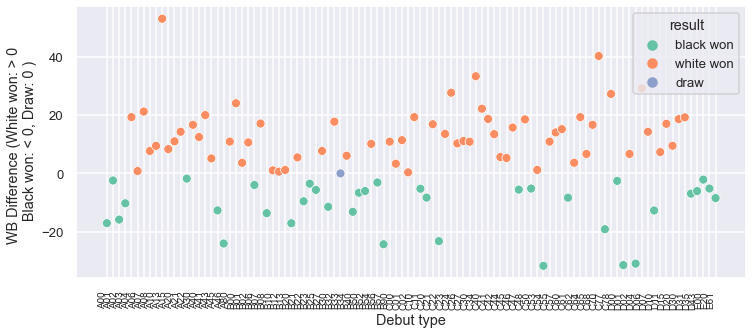

In [15]:
result = data_debut_type.w_b_perc.apply(lambda x: 'white won' if x>0 else 'black won' if x<0 else 'draw').rename('result')
plt.figure(figsize=(12,5))

sns.scatterplot(x='opening_eco', y='w_b_perc', data=data_debut_type.iloc[:100], hue=result) \
    .set(xlabel='Debut type', ylabel='WB Difference (White won: > 0 \n Black won: < 0, Draw: 0 )')

plt.xticks(
    rotation=90, 
    horizontalalignment='right',
    fontweight='light',
    fontsize='x-small')
plt.show()

In [16]:
result.iloc[:100].value_counts()

white won    63
black won    36
draw          1
Name: result, dtype: int64

__So, white won more often in 63 openings out of 100__ <br>
__Black won more often in 36 openings out of 100__

### By player rating

Let's explore the rating of participants. We'll see the game results where the difference in players' rating is less than 40 points

In [17]:
data_rating = df[['white_rating', 'black_rating', 'winner']]

In [18]:
data_rating.head()

,white_rating,black_rating,winner
0,1500,1191,white
1,1322,1261,black
2,1496,1500,white
3,1439,1454,white
4,1523,1469,white


__Here we can see that the difference between `white` and `black` wins is quite small.__

In [19]:
data_rating[abs(data_rating.white_rating - data_rating.black_rating) <= 40].groupby('winner').winner.count()

winner
black    2108
draw      237
white    2278
Name: winner, dtype: int64

In [20]:
difference = []
for i in range(1, 101, 1):
    d = data_rating[abs(data_rating.white_rating - data_rating.black_rating) <= i].groupby('winner').winner.count()
    difference.append(d[2] - d[0])

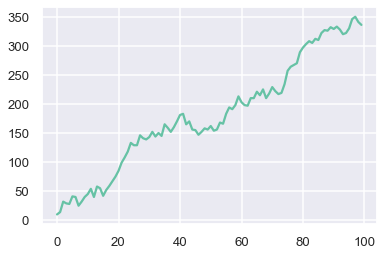

In [21]:
plt.plot(difference)

__Obviously, the bigger difference in points, the bigger difference in skill and experience, the bigger difference in `white` and `black` wins ratio.__

### Conclusion

Indeed, we saw that in general `white` win more often. However, based on this analysis we can't prove that this is because of the `first move advantage`. There may be other features that impact on the result - skill level (points), popularity of debuts, game type and maybe other factors that can't be found in this particular dataset  